<img src="Instacart_logo_small.png" alt="Instacart" style="width: 100px;"/>

# Recommend products to Instacart Customers

## Introduction

Graphical representations force us to notice something that we have never expected to see. When we are lost in too much of data, a visual information map is really useful. <br><br>Let's take a look at the instacart data and find some answers.

### Import Libraries

In [1]:
# EDA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot
from plotly.graph_objs import *
import plotly.graph_objs as go
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

### Import Datasets

In [2]:
df_final = pd.read_csv("data_final.csv")

In [3]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22026608 entries, 0 to 22026607
Data columns (total 22 columns):
Unnamed: 0                int64
order_id                  int64
product_id                int64
add_to_cart_order         int64
reordered                 bool
product_name              object
aisle_id                  int64
department_id             int64
department                object
aisle                     object
user_id                   int64
eval_set                  object
order_number              int64
order_dow                 int64
order_hour_of_day         int64
days_since_prior_order    int64
order_size                int64
total_order_count         int64
potential_customer        bool
days_order_span           int64
is_organic                bool
user_item_count           int64
dtypes: bool(3), int64(15), object(4)
memory usage: 3.2+ GB


### Convert a few columns to category

In [4]:
df_final.eval_set = df_final.eval_set.astype('category')
df_final.product_name = df_final.product_name.astype('category')
df_final.department = df_final.department.astype('category')
df_final.aisle = df_final.aisle.astype('category')
df_final.order_dow = df_final.order_dow.astype('category')
df_final.order_hour_of_day = df_final.order_hour_of_day.astype('category')

# Data Visualization

### Reordered Ratio

Let's take a look if products are reordered often. 

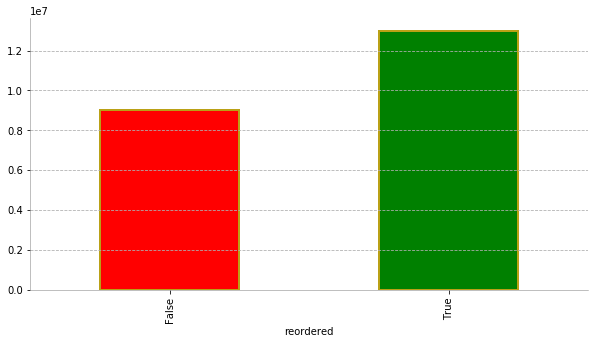

In [5]:
fig = plt.figure(figsize=(10,5))
ax1 = df_final.groupby('reordered')['order_id'].count().plot("bar",align='center', color=['red','green'],edgecolor='#baa116', linewidth=2)
ax1.yaxis.grid(linestyle='--')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_linewidth(0.5)
ax1.spines['bottom'].set_linewidth(0.5)
ax1.spines['left'].set_color('gray')
ax1.spines['bottom'].set_color('gray')

### Departments Distribution

What are the departments we can shop from at Instacart?

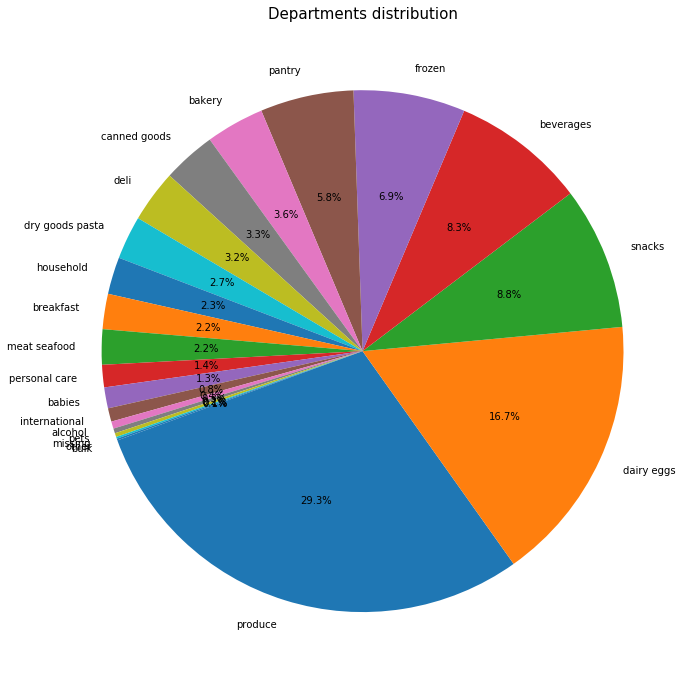

In [6]:
plt.figure(figsize=(12,12))
dept_dist = df_final['department'].value_counts()
labels = (np.array(dept_dist.index))
sizes = (np.array((dept_dist / dept_dist.sum())*100))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=200)
plt.title("Departments distribution", fontsize=15)
plt.show()

### Popular Poducts

What are the popular items sold at Instacart?

There are 1573552 words in the combination of all review.


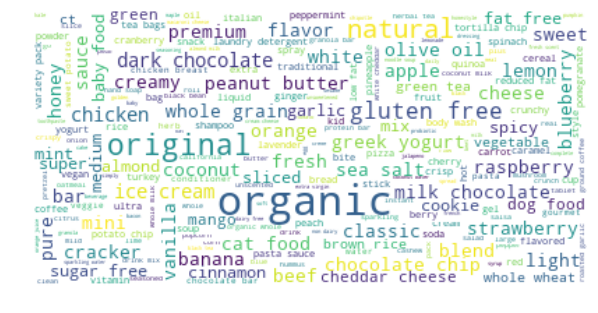

In [7]:
products = " ".join(item for item in df_final.product_name.unique())
print ("There are {} words in the combination of all review.".format(len(products)))
wordcloud = WordCloud(max_font_size=30, max_words=500, background_color="white").generate(products)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Top 20 Reodered Products

Which product are mostly reordered?

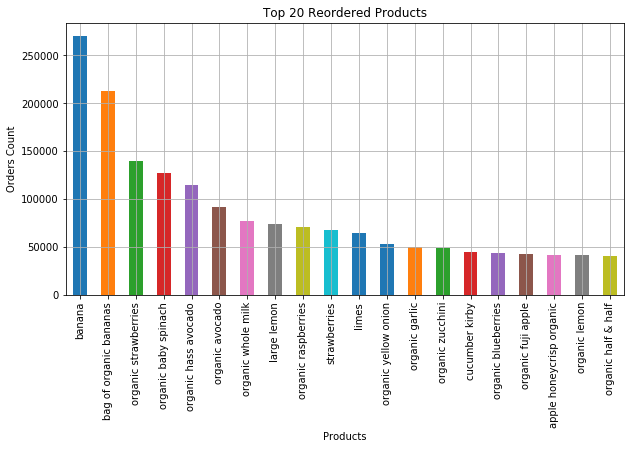

In [8]:
pl1 = df_final[df_final.reordered == True]['product_name'].value_counts()[:20].plot("bar",title = "Top 20 Reordered Products",figsize=(10,5))
pl1.set_xlabel("Products")
pl1.set_ylabel("Orders Count")
pl1.grid(True)

### Top 20 Reordered Aisle

From which Aisles, the products are usually reordered?

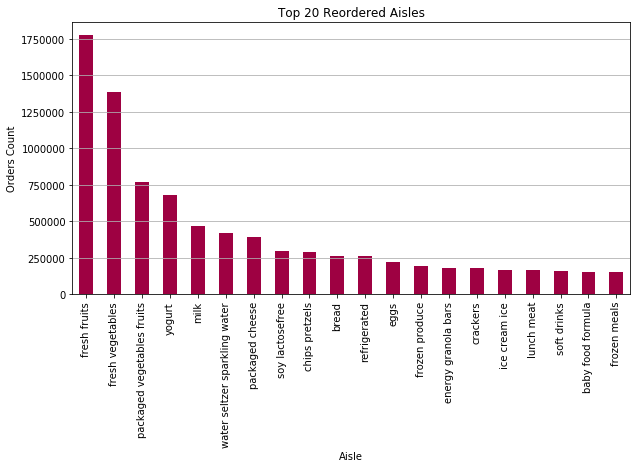

In [9]:
pl3 = df_final[df_final.reordered == True]['aisle'].value_counts()[:20].plot("bar",title = "Top 20 Reordered Aisles",colormap = 'Spectral', figsize=(10,5))
pl3.set_xlabel("Aisle")
pl3.set_ylabel("Orders Count")
pl3.yaxis.grid(True, which='major') 

### Cart Size Trends for Orders

How many items are ususlly added to a cart by the customers?

/Users/oindrilasen/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



Text(0.5, 1.0, 'Cart Size Trends')

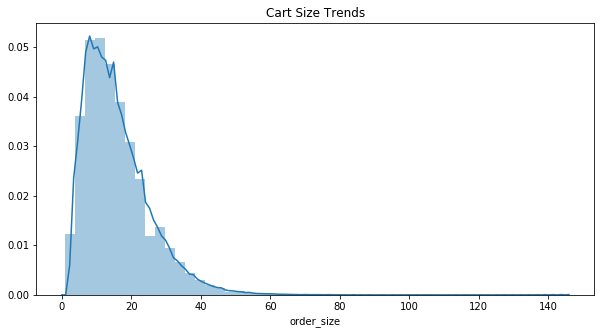

In [10]:
fig = plt.figure(figsize=(10,5))
ax = plt.axes()
sns.distplot(df_final.order_size)
ax.set_title('Cart Size Trends')

### Busiest Day of the week

Which day of the week, shopping is at peak?

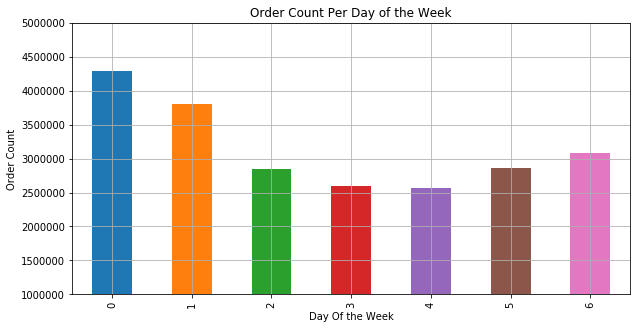

In [11]:
pl4 =  df_final.groupby("order_dow")['order_id'].count().plot("bar",title = "Order Count Per Day of the Week",figsize=(10,5))
pl4.set_xlabel("Day Of the Week")
pl4.set_ylabel("Order Count")
pl4.set_ylim(1000000,5000000)
pl4.grid(True)

### Busiest Hour of the day

At what time of a day, people feel like buying things?

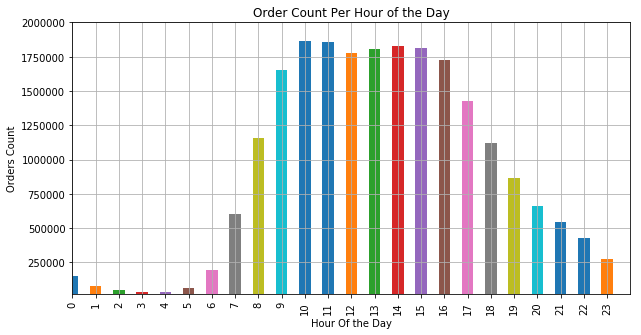

In [12]:
pl5 =  df_final.groupby("order_hour_of_day")['order_id'].count().plot("bar",title = "Order Count Per Hour of the Day",figsize=(10,5))
pl5.set_xlabel("Hour Of the Day")
pl5.set_ylabel("Orders Count")
pl5.set_ylim(20000,2000000)
pl5.set_xlim(0,24)
pl5.grid(True)

### Order Frequency by Day and Hour

Which day and at what time shopping is Maximumn and also Minimum?

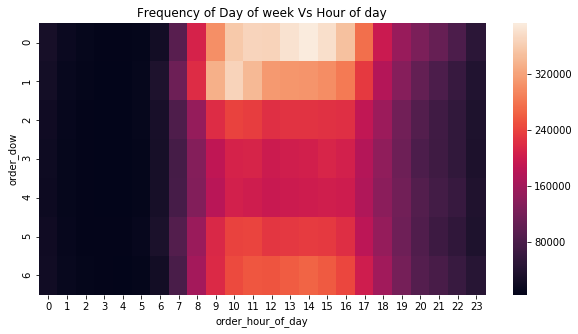

In [13]:
grouped_df = df_final.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
grouped_df = grouped_df.pivot('order_dow', 'order_hour_of_day', 'order_number')

plt.figure(figsize=(10,5))
sns.heatmap(grouped_df)
plt.title("Frequency of Day of week Vs Hour of day")
plt.show()

### Departments Selling Organic Products

Which Departments are selling Organic Products?

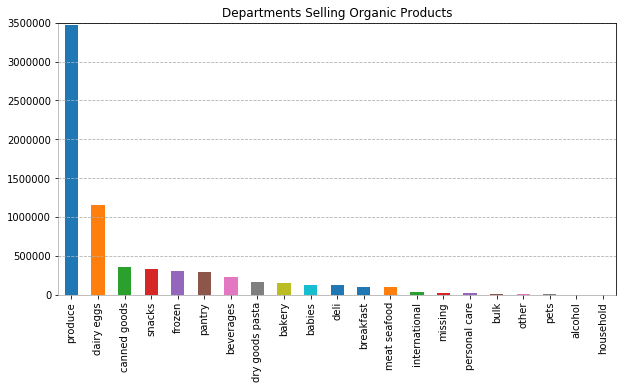

In [14]:
fig = plt.figure(figsize=(10,5))
ax1= df_final[df_final["is_organic"] == True]["department"].value_counts().plot("bar",title = "Departments Selling Organic Products", stacked=True)
ax1.yaxis.grid(linestyle='--')
ax1.spines['left'].set_linewidth(0.5)
ax1.spines['bottom'].set_linewidth(0.5)
ax1.set_ylim(100,3500000)
ax1.spines['left'].set_color('gray')
ax1.spines['bottom'].set_color('gray')

### Which items are popular - Organic or Inorganic?

At Instacart, are Customers more likely to buy Organic Products?

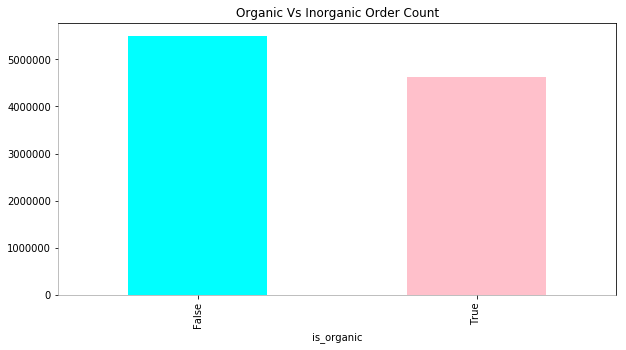

In [15]:
fig = plt.figure(figsize=(10,5))
ax1= df_final[df_final.department.isin(["produce","dairy eggs"])].groupby("is_organic")["order_id"].count().plot("bar",title = "Organic Vs Inorganic Order Count",color = ['cyan','pink'], stacked=True)
ax1.spines['left'].set_linewidth(0.5)
ax1.spines['bottom'].set_linewidth(0.5)
ax1.spines['left'].set_color('gray')
ax1.spines['bottom'].set_color('gray')

### How Frequently Do Customers order?

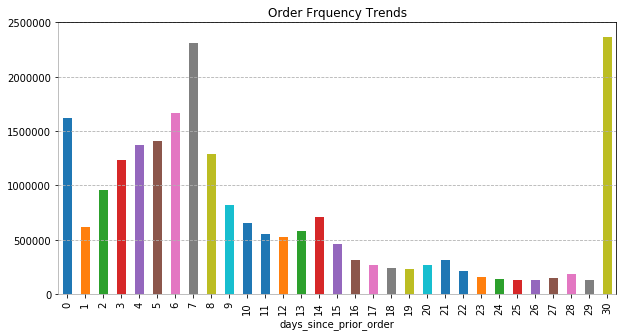

In [16]:
fig = plt.figure(figsize=(10,5))
ax1= df_final.groupby("days_since_prior_order")['order_id'].count().plot("bar",title = "Order Frquency Trends", stacked=True)
ax1.yaxis.grid(linestyle='--')
ax1.spines['left'].set_linewidth(0.5)
ax1.spines['bottom'].set_linewidth(0.5)
ax1.set_ylim(100,2500000)
ax1.spines['left'].set_color('gray')
ax1.spines['bottom'].set_color('gray')

### How many customers are potential customer and  order more than Average?

(1000000, 14000000)

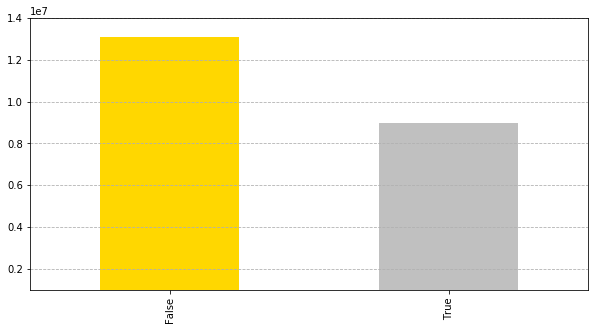

In [17]:
fig = plt.figure(figsize=(10,5))
ax = df_final.potential_customer.value_counts().plot("bar",color=['gold','silver'], linewidth=2)
ax.yaxis.grid(linestyle='--')
ax.set_ylim(1000000,14000000)

### Top 20 loyal customers who are ordering for a long time

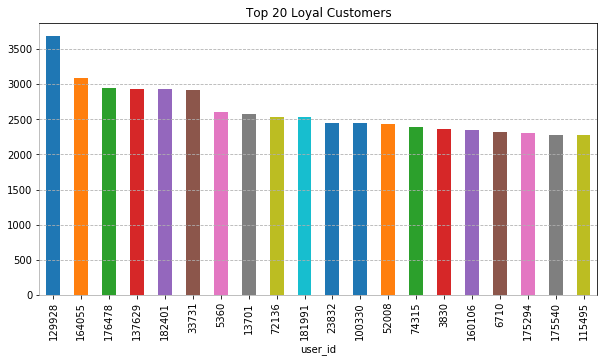

In [18]:
fig = plt.figure(figsize=(10,5))
ax1= df_final.groupby("user_id")["days_order_span"].count().sort_values(ascending=False)[:20].plot("bar",title = "Top 20 Loyal Customers", stacked=True)
ax1.yaxis.grid(linestyle='--')
ax1.spines['left'].set_linewidth(0.5)
ax1.spines['bottom'].set_linewidth(0.5)
ax1.spines['left'].set_color('gray')
ax1.spines['bottom'].set_color('gray')